In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Precipitation Analysis

In [81]:
# Find the most recent date in the data set.

dataset_latest_date = session.query(Measurement).order_by(Measurement.date.desc()).first()
print(dataset_latest_date.date)

2017-08-23


In [82]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

import datetime as dt

one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [84]:
# Perform a query to retrieve the data and precipitation scores

data_selection = [Measurement.date, Measurement.prcp]

data_query_results = session.query(*data_selection).filter(Measurement.date >= '2016-08-23').all()

date_prcp_list = []

for x in data_query_results:
    (m_dt, m_prcp) = x
    
    date_prcp_list.append({"date" : m_dt,
                           "prcp" : m_prcp})
    
    


In [85]:
# Save the query results as a Pandas DataFrame and set the index to the date column

date_prcp_df = pd.DataFrame(date_prcp_list, columns=['date','prcp'])
date_prcp_df = date_prcp_df.set_index("date")
date_prcp_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [86]:
# Sort the dataframe by date

date_prcp_df = date_prcp_df.sort_values('date')
date_prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


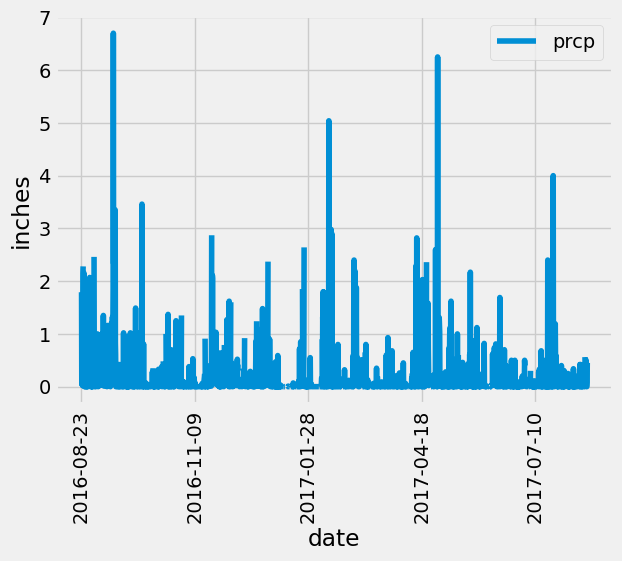

In [90]:
# Use Pandas Plotting with Matplotlib to plot the data

date_prcp_df.plot(ylabel = "inches", rot=90, legend=True)
plt.show()

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

#dataset_latest_date += 1
#print(dataset_latest_date)

# Perform a query to retrieve the data and precipitation scores

session.query(Measurement.date).filter(Measurement.date > '2016-08-23')
#for x in dates:
 #   print(dates)

# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()